In [1]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D,MaxPool2D, Dropout, Flatten

from keras.optimizers import adam
from keras.callbacks import Callback, ModelCheckpoint
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('tf')

Using TensorFlow backend.


In [24]:
(X_train,Y_train),(X_test,Y_test) = cifar10.load_data()

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)


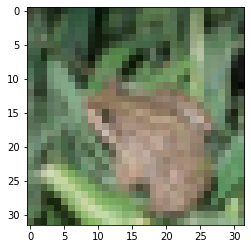

In [25]:
plt.imshow(X_test[4])

In [5]:
X_test[4][0]

array([[ 65,  68,  50],
       [ 70,  81,  64],
       [ 48,  64,  46],
       [ 30,  46,  30],
       [ 23,  33,  22],
       [ 40,  57,  36],
       [ 44,  75,  55],
       [ 45,  80,  57],
       [ 45,  83,  59],
       [ 40,  70,  54],
       [ 10,  20,  12],
       [ 15,  34,  18],
       [ 44,  71,  43],
       [ 53,  75,  44],
       [ 51,  70,  49],
       [ 48,  66,  50],
       [ 65,  87,  58],
       [ 90, 120,  77],
       [ 93, 124,  81],
       [ 91, 121,  77],
       [ 95, 126,  83],
       [ 81, 108,  78],
       [ 60,  84,  56],
       [ 55,  82,  57],
       [112, 136,  97],
       [111, 129,  93],
       [ 41,  59,  31],
       [ 68,  91,  58],
       [ 77,  96,  65],
       [ 51,  67,  41],
       [ 54,  76,  53],
       [ 67,  87,  66]], dtype=uint8)

### x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [26]:
mean = np.mean(X_train,axis = (0,1,2,3))
std = np.std(X_train,axis = (0,1,2,3))
x_train = (X_train-mean)/(std+1e-7)
x_test = (X_test-mean)/(std+1e-7)
x_test[4][0]

array([[-0.86839437, -0.82162904, -1.10222107],
       [-0.79045214, -0.61897924, -0.88398282],
       [-1.13339796, -0.88398282, -1.16457485],
       [-1.41398999, -1.16457485, -1.41398999],
       [-1.52310911, -1.36722465, -1.53869756],
       [-1.25810553, -0.99310194, -1.32045931],
       [-1.19575174, -0.71250991, -1.02427884],
       [-1.1801633 , -0.63456768, -0.99310194],
       [-1.1801633 , -0.58780235, -0.96192505],
       [-1.25810553, -0.79045214, -1.03986728],
       [-1.72575891, -1.56987445, -1.69458202],
       [-1.64781668, -1.3516362 , -1.60105134],
       [-1.19575174, -0.7748637 , -1.21134019],
       [-1.05545573, -0.71250991, -1.19575174],
       [-1.08663262, -0.79045214, -1.11780951],
       [-1.13339796, -0.85280593, -1.10222107],
       [-0.86839437, -0.52544856, -0.9775135 ],
       [-0.47868322, -0.01102984, -0.68133302],
       [-0.43191788,  0.05132394, -0.61897924],
       [-0.46309478,  0.00455861, -0.68133302],
       [-0.40074099,  0.08250084, -0.587

In [27]:
nClasses = 10
print(Y_train[0])
y_train = np_utils.to_categorical(Y_train,nClasses)
y_test = np_utils.to_categorical(Y_test,nClasses)
print(y_train[0])

[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [48]:
input_shape = x_train[0].shape
print(input_shape)

(32, 32, 3)


In [9]:
def createModel():
    model = Sequential()
    model.add(Conv2D(32,kernel_size=3,activation='relu',
                    input_shape=input_shape))
    model.add(Dropout(0.3))
    model.add(Conv2D(32,kernel_size=3,activation='relu',
                    input_shape = (30,30,32)))
    model.add(MaxPool2D(2))
    model.add(Conv2D(64,kernel_size=3,activation='relu',
                    input_shape=(14,14,32)))
    model.add(Dropout(0.3))
    model.add(Conv2D(64,kernel_size=3,activation='relu',
                    input_shape=(12,12,64)))
    model.add(MaxPool2D(2))
    model.add(Conv2D(128,kernel_size=5,activation='relu',
                    input_shape=(5,5,64)))
    model.add(Flatten())
    model.add(Dense(84,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    
    return model

In [10]:
K.clear_session()
model = createModel()

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        36928     
__________

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [13]:
checkpoint = ModelCheckpoint('weights.hdf5',monitor='val_loss',save_best_only=True)
callbacks_list=[checkpoint]
training = model.fit(x_train,y_train,validation_split=0.2,
         epochs = 25, batch_size = 20,callbacks=callbacks_list)

Train on 40000 samples, validate on 10000 samples
Epoch 1/25
40000/40000 [==============================] - 65s 2ms/step - loss: 1.4694 - acc: 0.4663 - val_loss: 1.1559 - val_acc: 0.5893
Epoch 2/25
40000/40000 [==============================] - 65s 2ms/step - loss: 1.0637 - acc: 0.6210 - val_loss: 0.9560 - val_acc: 0.6631
Epoch 3/25
40000/40000 [==============================] - 64s 2ms/step - loss: 0.8948 - acc: 0.6856 - val_loss: 0.9804 - val_acc: 0.6521
Epoch 4/25
40000/40000 [==============================] - 65s 2ms/step - loss: 0.8030 - acc: 0.7174 - val_loss: 0.8180 - val_acc: 0.7163
Epoch 5/25
40000/40000 [==============================] - 65s 2ms/step - loss: 0.7393 - acc: 0.7422 - val_loss: 0.8124 - val_acc: 0.7163
Epoch 6/25
40000/40000 [==============================] - 64s 2ms/step - loss: 0.6772 - acc: 0.7621 - val_loss: 0.8147 - val_acc: 0.7194
Epoch 7/25
40000/40000 [==============================] - 64s 2ms/step - loss: 0.6406 - acc: 0.7752 - val_loss: 0.7825 - val_acc

In [16]:
model.load_weights('weights.hdf5')

In [17]:
model.evaluate(x_test,y_test,batch_size=25)

10000/10000 [==============================] - 3s 293us/step


[0.8054370625317097, 0.7316000024229288]

In [18]:
show_images(x_test[:16])

NameError: name 'show_images' is not defined

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

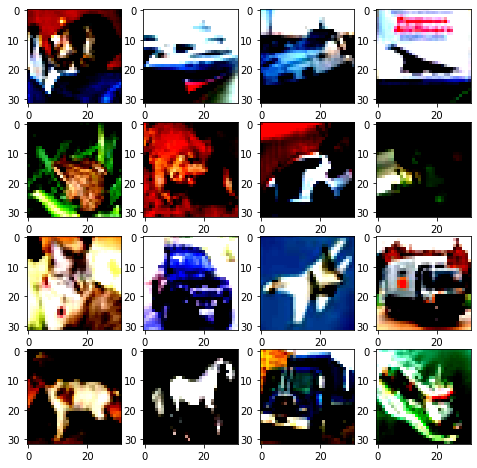

In [46]:
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 4
for i in range(1,columns*rows+1):
    img = x_test[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

In [19]:
labels =  ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [44]:
indices = np.argmax(model.predict(x_test[:16]),1)
print('True')
print([labels[int(Y_test[x])] for x in range(16)])
print('Predicted')
print ([labels[x] for x in indices])

True
['cat', 'ship', 'ship', 'airplane', 'frog', 'frog', 'automobile', 'frog', 'cat', 'automobile', 'airplane', 'truck', 'dog', 'horse', 'truck', 'ship']
Predicted
['dog', 'ship', 'ship', 'airplane', 'frog', 'frog', 'automobile', 'frog', 'cat', 'automobile', 'airplane', 'truck', 'dog', 'horse', 'truck', 'ship']
